# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2021.02.08.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 

In [112]:
MY_UNIQNAME = 'natmay'

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [113]:
import pandas as pd
import numpy as np

invoices = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
items = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
purchases = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')



In [114]:

unique_invoices = invoices.drop_duplicates('InvoiceNo')
shipped_invoices = unique_invoices[~unique_invoices.InvoiceNo.str.contains('C')]

1. Load the data. 
Loaded into: invoiced, items, and purchases

In [115]:
# 2. How many total invoices have been placed?
print(f'2. {len(shipped_invoices)} total (shipped) invoices')

2. 22064 "shipped" total invoices


In [116]:
# 3. How many unique customers are there?
len(shipped_invoices.CustomerID.unique())
print(f'3. {len(shipped_invoices.CustomerID.unique())} unique customers (who did not cancel their order)')

3. 4340 unique customers (who did not cancel their order)


In [117]:
# 4) What the total number of unique items?
print(f'4. There are {len(items.StockCode.unique())} unique items.')


4. 4070 unique items


In [118]:
# 5) Are there any columns with null values?
print(items.isnull().values.any())
print(shipped_invoices.isnull().values.any())
print(purchases.isnull().values.any())
print('5. Yes, there are null values in the "items" table and "invoices" table, but not the "purchases" table')

True
True
False
5. Yes, there are null values in the "items" table and "invoices" table, but not the "purchases" table


In [119]:
# 6) Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

print('6. The "items.StockCode" can likely be joined on "purchases.StockCodeSC". Also, "purchases.InvoiceNo" and "invoices.purchases" can likely be joined.')

6. The "items.StockCode" can likely be joined on "purchases.StockCodeSC". Also, "purchases.InvoiceNo" and "invoices.purchases" can likely be joined.


### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [237]:
# 1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
most_inv = shipped_invoices.groupby(['CustomerID']).size().sort_values(ascending=False).head(10).to_frame('TotalInvoices')

most_inv

,TotalInvoices
CustomerID,
12748.0,210
14911.0,201
17841.0,124
13089.0,97
14606.0,93
15311.0,91
12971.0,86
14646.0,74
16029.0,63


In [236]:
# 2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.

c_ID_add = pd.merge(purchases, shipped_invoices, on="InvoiceNo", how="left")

most_quant = c_ID_add.groupby('CustomerID').sum().sort_values(by="Quantity", ascending=False).head(10)

most_quant

,Quantity
CustomerID,
14646.0,197491
16446.0,80997
14911.0,80515
12415.0,77670
12346.0,74215
17450.0,69993
17511.0,64549
18102.0,64124
13694.0,63312


In [122]:
# 3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.
pd.merge(pd.DataFrame({'Invoices': most_inv}), most_quant, on="CustomerID", how="outer")

,Invoices,Quantity
CustomerID,,
12748.0,210.0,NaN
14911.0,201.0,80515.0
17841.0,124.0,NaN
13089.0,97.0,NaN
14606.0,93.0,NaN
15311.0,91.0,NaN
12971.0,86.0,NaN
14646.0,74.0,197491.0
16029.0,63.0,NaN


Having more invoices does not *necessarily* indicate a higher quantity. However, there are 2 customers (14911.0 & 14646.0) in the top 10 invoice count and quanity. Given the large number of customers, I can *predict* that there is a strong correlation. 

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $20?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [123]:
# 1. What is the average item-unit price?
unique_items = items.drop_duplicates()
avg_price = unique_items.mean()
print(f'The average unit price is ${round(avg_price[0], 2)}.')

The average unit price is $6.91.


In [124]:
# 2. What % of items are under $20?
under_20 = len(unique_items[unique_items.UnitPrice < 20.0]) 
print(f'{round(100 * under_20 / len(unique_items), 1)}% of items are under $20.')

98.4% of items are under $20


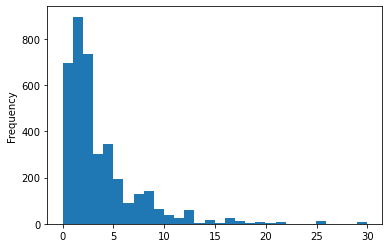

In [125]:
# 3. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram?

unique_items.describe()
unique_items[(unique_items.UnitPrice < 30) & (unique_items.UnitPrice > 0)].UnitPrice.plot.hist(bins=30)


I chose prices greater than 0 and less than 30. The min of greater than 0 was to eliminate free products for which the meaning of unit price is irrelavant. I capped it at \$30 simply to remove the long tail of the graph and extreme outlier. 

I noticed that prices tend to be lower than \$13 and *mostly* less than \$5.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them, do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 25%.) 
1. Do the top invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [126]:
# 1. What are the top 10 most ordered items? Describe them, do you see any trends?

purchases['StockCode'] = purchases.StockCodeSC.str[2:]

most_ordered = purchases.groupby(['StockCode']).size().sort_values(ascending=False).head(10)

pd.merge(most_ordered.to_frame('purchases'), items, on="StockCode", how="left")


,StockCode,purchases,Description,UnitPrice
0,85123A,2313,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,22423,2203,REGENCY CAKESTAND 3 TIER,10.95
2,85099B,2159,JUMBO BAG RED RETROSPOT,1.65
3,47566,1727,PARTY BUNTING,9.32
4,20725,1639,LUNCH BAG RED RETROSPOT,1.65
5,84879,1502,ASSORTED COLOUR BIRD ORNAMENT,1.69
6,22720,1477,SET OF 3 CAKE TINS PANTRY DESIGN,4.95
7,22197,1476,SMALL POPCORN HOLDER,0.72
8,21212,1385,PACK OF 72 RETROSPOT CAKE CASES,0.42
9,20727,1350,LUNCH BAG BLACK SKULL.,1.65


You can see the 10 most ordered item above. There are 3 cake accessories, a party bunting, a popcorn holder, and a skull product (halloween), so I think this store sells party and holiday supplies and decorations. 

In [127]:
# 2. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 25%.)

joined = pd.merge(purchases, items, on="StockCode", how="left")

joined['Profit'] = round(joined.Quantity * joined.UnitPrice * 0.25, 2)

most_profitable = joined.groupby(['InvoiceNo']).sum().sort_values(by="Profit", ascending=False).head(5)

most_profitable

,Quantity,UnitPrice,Profit
InvoiceNo,,,
547966,1000,569.77,142442.50
581483,80995,2.08,42117.40
541431,74215,1.04,19295.90
556255,3600,99.48,7461.00
556917,15049,356.45,6909.18


Invoice numbers 547966, 581483, 541431, 556255, & 556917 have the highest profit.

In [128]:
# 3. Do the top invoices contain any of the top 10 most ordered items?

profitable_invoices = purchases[purchases['InvoiceNo'].isin(profitable_invoice_nos)]

profitable_invoices[profitable_invoices['StockCode'].isin(most_ordered.index.tolist())]

,InvoiceNo,StockCodeSC,Quantity,StockCode
228201,556917,SC20725,100,20725
228229,556917,SC85099B,100,85099B
228240,556917,SC22423,32,22423
228247,556917,SC21212,240,21212
228250,556917,SC22720,96,22720


Yes. the most profitable invoices include the items, 20725, 85099B, 22423, 21212, & 22720.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1000  
 * medium value: greater than 1000 less than \$8000
 * high value: greater than \$8000
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Select three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [153]:
# 1. Classify customers into segments based on the total revenue they have generated for the company.
# - low value: less than $1000
# - medium value: greater than 1000 less than $8000
# - high value: greater than $8000
# How many customers are in each segment?

items # StockCode, Description, UnitPrice
purchases #InvoiceNo, StockCodeSC, Quantity
shipped_invoices #InvoiceNo, InvoiceDate, CustomerID, Country

# 
all_joined = pd.merge(joined, shipped_invoices, on="InvoiceNo", how="left")[['Profit', 'InvoiceNo', 'CustomerID', 'StockCode', 'Quantity']]

customer_profit = all_joined.groupby('CustomerID').sum()

customer_profit['ProfitGroup'] = pd.cut(customer_profit.Profit, bins=[0, 1000, 8000, np.inf], labels=['low value','medium value','high value'], right=False)

customer_profit.groupby('ProfitGroup').size()

ProfitGroup
low value       3869
medium value     434
high value        36
dtype: int64

There are 36 high-value customers, 434 medium-value customers, and 3869 low-value customers.

In [232]:
# 2. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.

customer_products = all_joined.groupby(['CustomerID', 'StockCode']).mean().sort_values(ascending=False, by="Quantity")

reset = customer_products.reset_index()

customer_product_groups = pd.merge(reset, customer_profit[['ProfitGroup']], on="CustomerID", how="left")

item_quant_pivot = customer_product_groups.pivot_table(index='StockCode', columns='ProfitGroup', values='Profit', aggfunc=np.mean).round(2)

item_quant_pivot

ProfitGroup,low value,medium value,high value
StockCode,,,
10002,1.68,4.66,1.38
10080,2.53,2.63,NaN
10120,0.34,0.35,0.16
10123C,0.27,NaN,NaN
10124A,0.34,NaN,NaN
...,...,...,...
C2,13.07,12.50,12.50
DOT,NaN,NaN,142.44
M,1.80,1.71,43.92


In [233]:
# 3. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning.

top_50_low = item_quant_pivot.sort_values(('low value'), ascending=False).head(50).index
top_50_medium = item_quant_pivot.sort_values(('medium value'), ascending=False).head(50).index
top_50_high = item_quant_pivot.sort_values(('high value'), ascending=False).head(50).index

print(len(top_50_low.intersection(top_50_medium)))
print(len(top_50_low.intersection(top_50_high)))
print(len(top_50_medium.intersection(top_50_high)))
print(len(top_50_low.intersection(top_50_medium).intersection(top_50_high)))

21
1
4
1


Of the top 50 items in each profiablility segment, low and medium share 21 items. I would say that this is a strong correlation considering the population of 4070 items. However, the high profiablility segment shares only 1 and 4 items with the low and medium segments respectively. More broadly then, no; order quantity is not generally the same across segments. 

In [234]:
# 4. Select three items and discuss any trends/differences you notice across the three segments.
np.random.seed(seed=99)
item_quant_pivot.sample(n=3)

ProfitGroup,low value,medium value,high value
StockCode,,,
22301,8.07,17.40,185.53
23458,6.03,6.73,7.48
22276,6.65,6.70,2.71


I choose a random sample of 3 rows from my pivot table. 

StockCode 22301 had a large range relative to the other 2 items. Both it and StockCode 22276 conform to my answer in the previous question. Interestingly, StockCode 22276 had a lower average order quatity in the high value segment while 22301 had a much higher average. 

StockCode 23458 was fairly consistent across the segments, increasing slightly in each. 

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas